In [186]:
import pandas as pd

In [187]:
dfs = []
letters = 'abcdef'
for letter in letters:
    df = pd.read_pickle(f'../data/results/rumc_hyperopt_test_pcr_{letter}.pkl')
    preds = df[df.metric == 'predictions'].value.values[0]
    data = {'model': [letter]}
    data.update({f'pred_{i}': [pred] for i, pred in enumerate(preds)})
    df2 = pd.DataFrame(data)
    dfs.append(df2)

In [188]:
df = pd.concat(dfs).reset_index(drop=True)
df['index'] = df.index
df

,model,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,...,pred_60,pred_61,pred_62,pred_63,pred_64,pred_65,pred_66,pred_67,pred_68,index
0,a,"(0.4390092743041437, Negatief)","(0.43900927429918124, Negatief)","(0.4390092742991569, Negatief)","(0.43900927429947917, Negatief)","(0.43900927429984543, Negatief)","(0.4390092743000412, Negatief)","(0.43900927429902387, Negatief)","(0.4390092743023101, Negatief)","(0.4390092743005776, Negatief)",...,"(0.43900927430832876, Positief)","(0.4390092743039547, Positief)","(0.4390092743022703, Negatief)","(0.4390092743015803, Negatief)","(0.4390092743009769, Negatief)","(0.43900927429997577, Negatief)","(0.4390092743030585, Negatief)","(0.4390092743025047, Negatief)","(0.4390092743019605, Negatief)",0
1,b,"(0.2522255212672347, Negatief)","(0.25222551505315804, Negatief)","(0.25222551524711445, Negatief)","(0.25222551536718063, Negatief)","(0.25222551579972263, Negatief)","(0.2522255160863779, Negatief)","(0.25222551495561596, Negatief)","(0.2522255184162083, Negatief)","(0.2522255164543879, Negatief)",...,"(0.2522255270653635, Positief)","(0.25222552110595764, Positief)","(0.2522255192561869, Negatief)","(0.25222551884436034, Negatief)","(0.25222551747474725, Negatief)","(0.25222551559514916, Negatief)","(0.2522255196453758, Negatief)","(0.2522255191301834, Negatief)","(0.25222551763756274, Negatief)",1
2,c,"(0.25222551931313425, Negatief)","(0.25222551929049847, Negatief)","(0.25222551929069803, Negatief)","(0.25222551929060394, Negatief)","(0.25222551929235104, Negatief)","(0.2522255192906798, Negatief)","(0.25222551929050674, Negatief)","(0.252225519296618, Negatief)","(0.2522255192951986, Negatief)",...,"(0.25222551934835685, Positief)","(0.2522255193085967, Positief)","(0.2522255193066435, Negatief)","(0.2522255193024546, Negatief)","(0.2522255192987391, Negatief)","(0.25222551929517795, Negatief)","(0.2522255193050254, Negatief)","(0.2522255193050254, Negatief)","(0.2522255192969472, Negatief)",2
3,d,"(0.019308041987647857, Negatief)","(0.008710470966995395, Negatief)","(0.0012176571322235477, Negatief)","(0.001802884672878923, Negatief)","(0.004563770415990826, Negatief)","(0.004179699100216045, Negatief)","(0.00024833377031666977, Negatief)","(0.05181157186645845, Negatief)","(0.00798739721781715, Negatief)",...,"(0.6959010334062136, Positief)","(0.5984302938780192, Positief)","(0.05305507148263643, Negatief)","(0.008841920564440697, Negatief)","(0.002731062274190959, Negatief)","(0.0053268966713931635, Negatief)","(0.2737124762423135, Negatief)","(0.028486863965690563, Negatief)","(0.19855675286659058, Negatief)",3
4,e,"(0.2522258654201827, Negatief)","(0.25222517922114185, Negatief)","(0.25222523532061136, Negatief)","(0.2522253278918645, Negatief)","(0.2522252903913128, Negatief)","(0.25222523053484047, Negatief)","(0.25222505264059886, Negatief)","(0.2522254183032892, Negatief)","(0.25222547627968667, Negatief)",...,"(0.252226137745747, Positief)","(0.25222609005282337, Positief)","(0.25222577861492357, Negatief)","(0.25222565228575466, Negatief)","(0.2522255669549704, Negatief)","(0.2522252881518681, Negatief)","(0.25222588004664365, Negatief)","(0.2522258301931942, Negatief)","(0.2522254042179251, Negatief)",4
5,f,"(0.4472796440137008, Negatief)","(0.04291066640407122, Negatief)","(0.05447158273454933, Negatief)","(0.024153554291736754, Negatief)","(0.04782174504216999, Negatief)","(0.014634966377815096, Negatief)","(0.008123873243018427, Negatief)","(0.3465297466010643, Negatief)","(0.06392363603708687, Negatief)",...,"(0.5315506432936216, Positief)","(0.8535002830935421, Positief)","(0.27808287634757445, Negatief)","(0.026884408507823844, Negatief)","(0.013197399305632755, Negatief)","(0.14212711773013573, Negatief)","(0.5307233776097754, Negatief)","(0.17272450492812783, Negatief)","(0.390798553882586, Negatief)",5


In [189]:
df['use_visual'] = [False, False, True, True, False, True]
df['features'] = ['all', 'hyperopt', 'all', 'hyperopt', 'erdi', 'erdi']

In [190]:
df = pd.wide_to_long(df, ['pred'], sep='_', i='index', j='sample')

In [191]:
df['preds_complex'] = df.pred.apply(lambda x: x[0] + (x[1] == 'Positief')*1j)

In [192]:
df

,,features,model,use_visual,pred,preds_complex
index,sample,,,,,
0,0,all,a,False,"(0.4390092743041437, Negatief)",0.439009+0.000000j
1,0,hyperopt,b,False,"(0.2522255212672347, Negatief)",0.252226+0.000000j
2,0,all,c,True,"(0.25222551931313425, Negatief)",0.252226+0.000000j
3,0,hyperopt,d,True,"(0.019308041987647857, Negatief)",0.019308+0.000000j
4,0,erdi,e,False,"(0.2522258654201827, Negatief)",0.252226+0.000000j
...,...,...,...,...,...,...
1,68,hyperopt,b,False,"(0.25222551763756274, Negatief)",0.252226+0.000000j
2,68,all,c,True,"(0.2522255192969472, Negatief)",0.252226+0.000000j
3,68,hyperopt,d,True,"(0.19855675286659058, Negatief)",0.198557+0.000000j


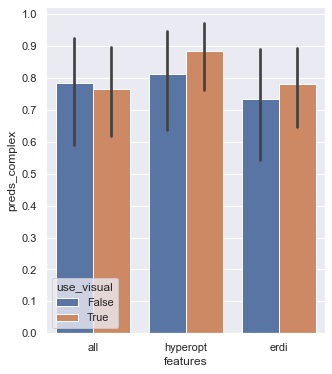

In [193]:
import seaborn as sns
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def test(x):
    preds = np.array(x).real
    true = np.array(x).imag
    try:
        return roc_auc_score(true, preds)
    except ValueError:
        return 0.0

sns.set()
plt.figure(figsize=(5, 6))
ax = sns.barplot(data=df, x='features', y='preds_complex', hue='use_visual', n_boot=10000, estimator=test)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1));

In [70]:
from bayesian_bootstrap.bootstrap import bayesian_bootstrap

In [81]:
def bootstrap(X, statistic, n_replications, n_resample):
    return [statistic(np.random.choice(X, size=n_resample)) for i in range(n_replications)]

<AxesSubplot:ylabel='Count'>

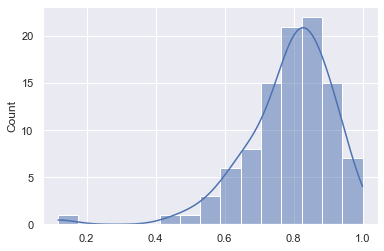

In [126]:
def roc_auc(x):
    pred, true = zip(*x)
#     error()
    try:
        return roc_auc_score(np.array(true) == 'Positief', pred)
    except:
        return 0.0

sns.histplot(bayesian_bootstrap(df[df.model == 'a'].pred.values, roc_auc, 100, len(df)//6), kde=True)

<AxesSubplot:ylabel='Count'>

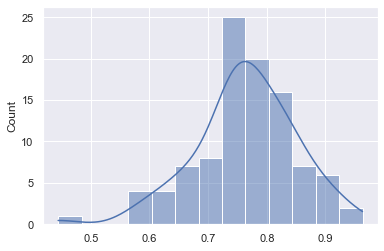

In [127]:
sns.histplot(bootstrap(df[df.model == 'a'].pred.values, roc_auc, 100, len(df)//6), kde=True)

In [144]:
study = joblib.load('../data/results/models/optuna/rumc_hyperopt_test_pcr_d_0.pkl')

In [147]:
([k for k, v in study.best_trial.params.items() if k.startswith('use_col') and v])

['use_col_A/E',
 'use_col_AB0/Rh.D bloedgroep',
 'use_col_AF',
 'use_col_ASAT',
 'use_col_AV PGmax',
 'use_col_Afwijkende lymfocyten suspect reactief',
 'use_col_Albumine',
 'use_col_Amylase',
 'use_col_Aniongap',
 'use_col_Ao SV diam',
 'use_col_Ao SV diam I',
 'use_col_Bezinking',
 'use_col_Bilirubine',
 'use_col_Bilirubine totaal',
 'use_col_Bloedgroep',
 'use_col_Bloedgroep 2',
 'use_col_CK',
 'use_col_CKD-EPI-GFR',
 'use_col_Calcium',
 'use_col_Cholesterol',
 'use_col_Dec Slope',
 'use_col_Diffusion SB DLCO Single Breath LL',
 'use_col_Diffusion SB DLCO Single Breath Pre',
 'use_col_Diffusion SB DLCO Single Breath Pre Z-sc',
 'use_col_Diffusion SB DLCO Single Breath Pred',
 'use_col_Diffusion SB DLCO_SB / VA LL',
 'use_col_Diffusion SB DLCO_SB / VA Pre Z-sc',
 'use_col_Diffusion SB DLCO_SB / VA Pre%Pred',
 'use_col_Diffusion SB DLCO_SB / VA Pred',
 'use_col_Diffusion SB VA SINGLE BREATH Pre',
 'use_col_Diffusion SB VIN SINGLE BREATH LL',
 'use_col_Diffusion SB VIN SINGLE BREATH Pr

In [135]:
vis_aucs = []
vis_cf_min = []
vis_cf_max = []
for letter in df[df.use_visual].model.unique():
    print(letter)
    vis_aucs.append(roc_auc(df[df.model == letter].pred.values))
    b = bayesian_bootstrap(df[df.model == letter].pred.values, roc_auc, 10000, len(df)*10)
    vis_cf_min.append(np.percentile(b, 2.5))
    vis_cf_max.append(np.percentile(b, 100-2.5))

c
d
f


In [136]:
no_vis_aucs = []
no_vis_cf_min = []
no_vis_cf_max = []
for letter in df[~df.use_visual].model.unique():
    print(letter)
    no_vis_aucs.append(roc_auc(df[df.model == letter].pred.values))
    b = bayesian_bootstrap(df[df.model == letter].pred.values, roc_auc, 10000, len(df)*10)
    no_vis_cf_min.append(np.percentile(b, 2.5))
    no_vis_cf_max.append(np.percentile(b, 100-2.5))

a
b
e


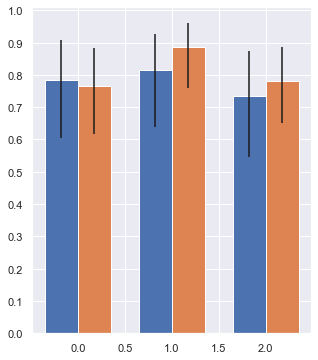

In [137]:
plt.figure(figsize=(5, 6))
plt.bar(np.arange(3)-0.175, no_vis_aucs, width=0.35, yerr=np.array([[no_vis_aucs[i]-no_vis_cf_min[i], no_vis_cf_max[i]-no_vis_aucs[i]] for i in range(3)]).T)
plt.bar(np.arange(3)+0.175, vis_aucs, width=0.35, yerr=np.array([[vis_aucs[i]-vis_cf_min[i], vis_cf_max[i]-vis_aucs[i]] for i in range(3)]).T)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1));

In [96]:
np.array([[aucs[i]-cf_min[i], cf_max[i]-aucs[i]] for i in range(6)]).shape

(6, 2)

In [132]:
np.arange(3)+0.5, vis_aucs, np.array([[vis_aucs[i]-vis_cf_min[i], vis_cf_max[i]-vis_aucs[i]] for i in range(3)]).T

(array([0.5, 1.5, 2.5]),
 [0.7664576802507836, 0.8855799373040752, 0.780564263322884],
 array([[0.16144512, 0.13591194, 0.14229057],
        [0.12716551, 0.0821528 , 0.11367721]]))

In [148]:
len(df)/6

69.0

In [296]:
bootstraps = []
for model in df.model.unique():
    print(model)
    bootstraps.append(bayesian_bootstrap(df[df.model == model].pred.values, roc_auc, 20000, len(df)))

a
b
c
d
e
f


In [297]:
results = {
    'model': df.model.unique(), 
    'mean_test_score': [np.mean(b) for b in bootstraps], 
    'std_test_score': [np.std(b) for b in bootstraps], 
}
results_df = pd.DataFrame(results).set_index('model')
results_df

,mean_test_score,std_test_score
model,,
a,0.783180,0.085576
b,0.813498,0.080014
c,0.766861,0.073479
d,0.885182,0.055847
e,0.735222,0.090193
f,0.781036,0.065067


In [298]:
import numpy as np
from scipy.stats import t


def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples, 1)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : int
        Variance-corrected standard deviation of the set of differences.
    """
    n = n_train + n_test
    corrected_var = (
        np.var(differences, ddof=1) * ((1 / n) + (n_test / n_train))
    )
    corrected_std = np.sqrt(corrected_var)
    return corrected_std


def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples, 1)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [299]:
model_scores = pd.DataFrame(np.array(bootstraps))

In [300]:
from itertools import combinations
from math import factorial

n_train = rumc.part.isin(['train', 'val']).sum()
n_test = rumc.part.isin(['test']).sum()
rope_interval = [-0.01, 0.01]

dof = 10000-1

n_comparisons = (
    factorial(len(model_scores))
    / (factorial(2) * factorial(len(model_scores) - 2))
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_stat, p_val = compute_corrected_ttest(
        differences, dof, n_train, n_test
    )
    p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [model_scores.index[model_i], model_scores.index[model_k],
         t_stat, p_val]
    )

In [301]:
pairwise_comp_df = pd.DataFrame(
    pairwise_t_test,
    columns=['model_1', 'model_2', 't_stat', 'p_val']
).round(3)

In [302]:
letters = pd.Series(list('abcdef'))
pairwise_comp_df['model_1'] = (df.groupby('model').features.first().loc[letters.iloc[pairwise_comp_df.model_1]] + '_' + df.groupby('model').use_visual.first().loc[letters.iloc[pairwise_comp_df.model_1]].astype(str)).reset_index(drop=True)

In [303]:
pairwise_comp_df['model_2'] = (df.groupby('model').features.first().loc[letters.iloc[pairwise_comp_df.model_2]] + '_' + df.groupby('model').use_visual.first().loc[letters.iloc[pairwise_comp_df.model_2]].astype(str)).reset_index(drop=True)

In [317]:
pairwise_comp_df[pairwise_comp_df.p_val < 0.05]

,model_1,model_2,t_stat,p_val
9,all_True,hyperopt_True,-3.064,0.016
12,hyperopt_True,erdi_False,3.362,0.006
13,hyperopt_True,erdi_True,2.880,0.030


In [306]:
from itertools import combinations
from scipy.stats import t

pairwise_bayesian = []
n_train = rumc.part.isin(['train', 'val']).sum()
n_test = rumc.part.isin(['test']).sum()
rope_interval = [-0.01, 0.01]

dof = 10000-1

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_post = t(
        dof, loc=np.mean(differences),
        scale=corrected_std(differences, n_train, n_test)
    )
    worse_prob = t_post.cdf(rope_interval[0])
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

    pairwise_bayesian.append([model_i, model_k, worse_prob, better_prob, rope_prob])

In [307]:
pairwise_bayesian_df = (pd.DataFrame(
    pairwise_bayesian,
    columns=['model_1', 'model_2', 'worse_prob', 'better_prob', 'rope_prob']
).round(3))

In [308]:
(df.groupby('model').features.first().loc[letters.iloc[pairwise_bayesian_df.model_1]] + '_' + df.groupby('model').use_visual.first().loc[letters.iloc[pairwise_bayesian_df.model_1]].astype(str)).reset_index(drop=True)

0          all_False
1          all_False
2          all_False
3          all_False
4          all_False
5     hyperopt_False
6     hyperopt_False
7     hyperopt_False
8     hyperopt_False
9           all_True
10          all_True
11          all_True
12     hyperopt_True
13     hyperopt_True
14        erdi_False
dtype: object

In [309]:
letters = pd.Series(list('abcdef'))
pairwise_bayesian_df['model_1'] = (df.groupby('model').features.first().loc[letters.iloc[pairwise_bayesian_df.model_1]] + '_' + df.groupby('model').use_visual.first().loc[letters.iloc[pairwise_bayesian_df.model_1]].astype(str)).reset_index(drop=True)

In [310]:
pairwise_bayesian_df['model_2'] = (df.groupby('model').features.first().loc[letters.iloc[pairwise_bayesian_df.model_2]] + '_' + df.groupby('model').use_visual.first().loc[letters.iloc[pairwise_bayesian_df.model_2]].astype(str)).reset_index(drop=True)

In [313]:
pairwise_bayesian_df[pairwise_bayesian_df.better_prob > 0.95]

,model_1,model_2,worse_prob,better_prob,rope_prob
12,hyperopt_True,erdi_False,0.000,0.999,0.001
13,hyperopt_True,erdi_True,0.001,0.995,0.004


In [316]:
pairwise_bayesian_df[pairwise_bayesian_df.worse_prob > 0.95]

,model_1,model_2,worse_prob,better_prob,rope_prob
2,all_False,hyperopt_True,0.984,0.004,0.011
9,all_True,hyperopt_True,0.997,0.000,0.002


In [180]:
pairwise_comp_df = pairwise_comp_df.join(pairwise_bayesian_df)
pairwise_comp_df

NameError: name 'pairwise_comp_df' is not defined

In [162]:
rumc = pd.read_pickle('../data/processed/rumc.pkl')

In [164]:
rumc.part.isin(['train', 'val']).sum()

677